Content of this notebook:<br>
1) data exploration of hedge funds<br>
2) data visualisation of the hedge funds<br>
3) data exploration of etf prices<br>
4) Calculation of QQQ's ATR<br>
4) visualisation for Average True Range (ATR) QQQ<br>
5) data exploration and visualisation of QQQ's Close<br>
6) Prediction of QQQ's Close price for next 10 weeks using ARIMA<br>

In [16]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [17]:
df_hf=pd.read_csv('../data/hedge_fund_raw.csv', delimiter=";")
df_hf['date'] = pd.to_datetime(df_hf['date'],infer_datetime_format=True)
df_hf= df_hf.set_index('date')
df_hf

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19%,3.93%,1.78%,7.91%,1.89%,2.13%,1.91%,5.73%,2.81%,1.50%,1.80%,-1.66%,3.17%
1997-02-28,1.23%,2.98%,1.22%,5.25%,1.01%,0.84%,1.22%,1.75%,-0.06%,0.34%,1.18%,4.26%,1.06%
1997-03-31,0.78%,-0.21%,-0.12%,-1.20%,0.16%,-0.23%,1.09%,-1.19%,-0.84%,0.60%,0.10%,7.78%,-0.77%
1997-04-30,0.86%,-1.70%,0.30%,1.19%,1.19%,-0.05%,1.30%,1.72%,0.84%,-0.01%,1.22%,-1.29%,0.09%
1997-05-31,1.56%,-0.15%,2.33%,3.15%,1.89%,3.46%,1.18%,1.08%,3.94%,1.97%,1.73%,-7.37%,2.75%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30,2.96%,-0.28%,1.97%,5.63%,1.24%,5.43%,0.76%,2.16%,5.63%,4.12%,2.13%,NaN,3.40%
2020-05-31,1.30%,0.00%,2.11%,2.42%,0.53%,3.01%,2.54%,1.27%,2.87%,0.30%,1.72%,NaN,2.16%
2020-06-30,2.48%,-0.80%,4.05%,5.24%,0.85%,2.31%,2.34%,0.22%,1.75%,1.57%,1.35%,-0.25%,1.82%


In [18]:
df_hf.isnull().sum()

Convertible Arbitrage     0
CTA Global                0
Distressed Securities     0
Emerging Markets          0
Equity Market Neutral     0
Event Driven              0
Fixed Income Arbitrage    0
Global Macro              0
Long/Short Equity         0
Merger Arbitrage          0
Relative Value            0
Short Selling             2
Funds Of Funds            0
dtype: int64

In [19]:
df_hf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 1997-01-31 to 2020-08-31
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Convertible Arbitrage   284 non-null    object
 1   CTA Global              284 non-null    object
 2   Distressed Securities   284 non-null    object
 3   Emerging Markets        284 non-null    object
 4   Equity Market Neutral   284 non-null    object
 5   Event Driven            284 non-null    object
 6   Fixed Income Arbitrage  284 non-null    object
 7   Global Macro            284 non-null    object
 8   Long/Short Equity       284 non-null    object
 9   Merger Arbitrage        284 non-null    object
 10  Relative Value          284 non-null    object
 11  Short Selling           282 non-null    object
 12  Funds Of Funds          284 non-null    object
dtypes: object(13)
memory usage: 31.1+ KB


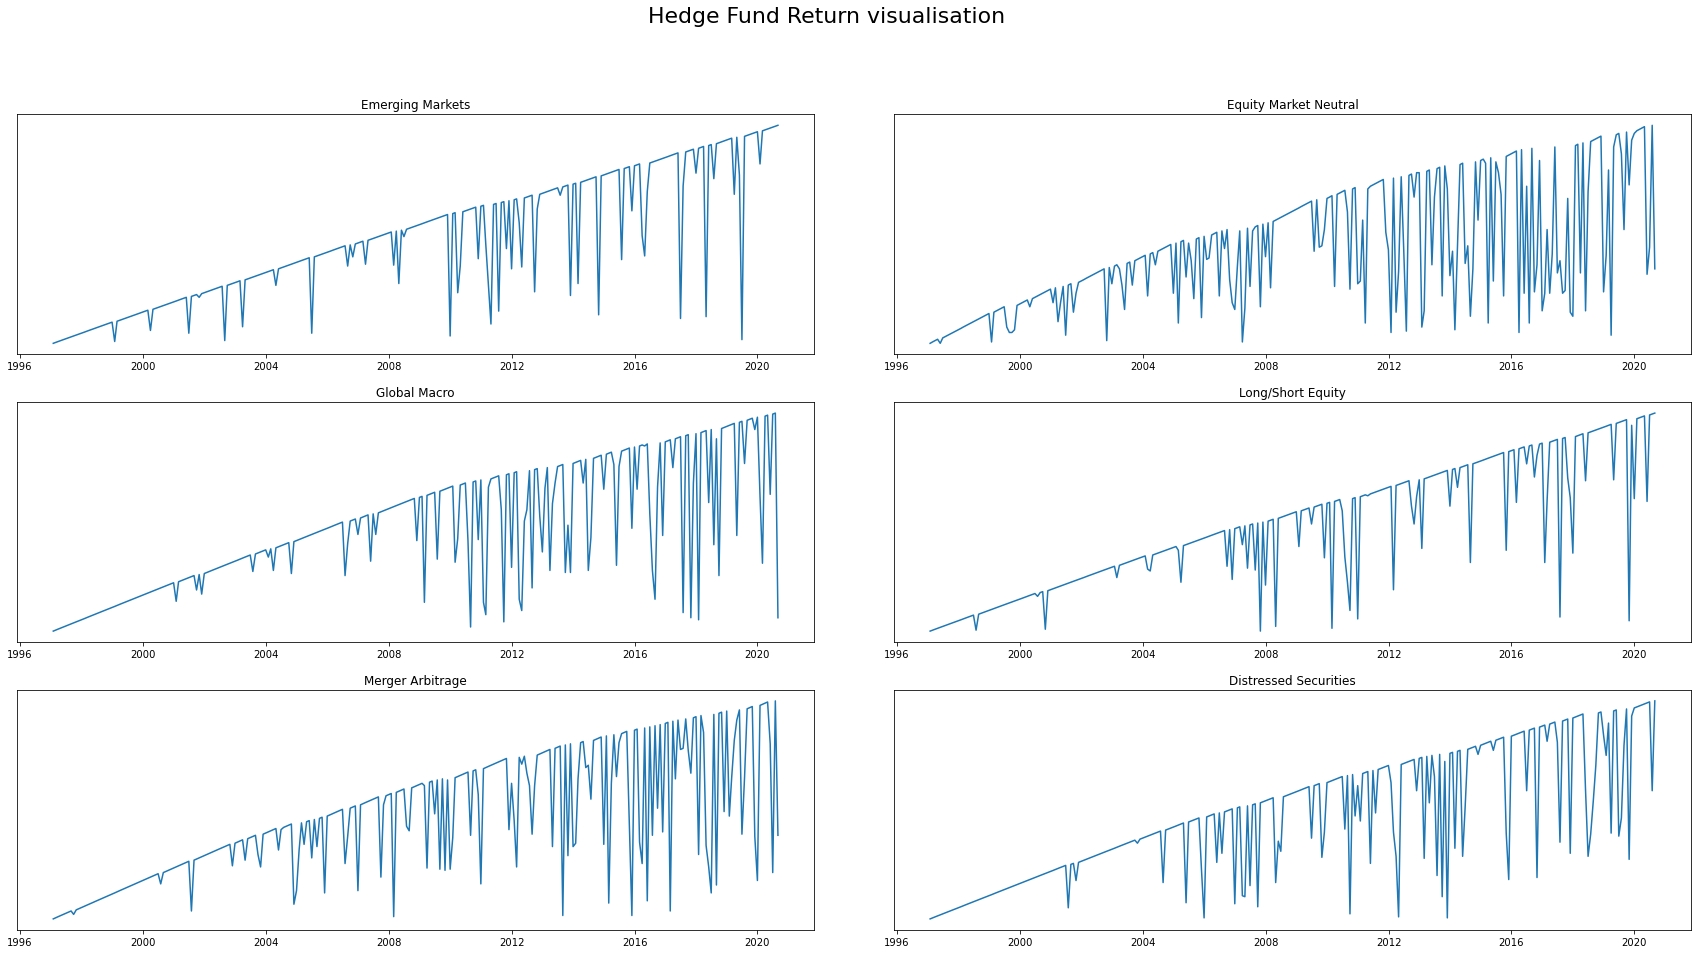

In [20]:
import matplotlib.pyplot as plt
# Draw Plot
fig, axes =plt.subplots(3,2,figsize=(30,15),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
fig.suptitle('Hedge Fund Return visualisation',fontsize= 22)

axes[0,0].plot(df_hf.index, df_hf["Emerging Markets"].values)
axes[0,0].set_title('Emerging Markets')
axes[0,1].plot(df_hf.index, df_hf["Equity Market Neutral"].values)
axes[0,1].set_title('Equity Market Neutral')
axes[1,0].plot(df_hf.index, df_hf["Global Macro"].values)
axes[1,0].set_title('Global Macro')
axes[1,1].plot(df_hf.index, df_hf["Long/Short Equity"].values)
axes[1,1].set_title('Long/Short Equity')
axes[2,0].plot(df_hf.index, df_hf["Merger Arbitrage"].values)
axes[2,0].set_title('Merger Arbitrage')
axes[2,1].plot(df_hf.index, df_hf["Distressed Securities"].values)
axes[2,1].set_title('Distressed Securities')

for ax in fig.axes:
    ax.set_yticks([])
    
plt.show();

In [21]:
df_prices=pd.read_excel('../data/prices.xlsx')
df_prices

,Date,Feature,AAPL,AGG,AMD,AMZN,BABA,EFA,EMB,FB,...,GOVT,HYG,LQD,MSFT,NVDA,QQQ,SPY,TSLA,^GSPC,^RUA
0,1999-12-31,Adj Close,7.860334e-01,NaN,1.446875e+01,7.612500e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.688678e+01,8.981856e-01,7.905042e+01,9.750941e+01,NaN,1.469250e+03,793.309998
1,1999-12-31,Close,9.179690e-01,NaN,1.446875e+01,7.612500e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.837500e+01,9.778650e-01,9.137500e+01,1.468750e+02,NaN,1.469250e+03,793.309998
2,1999-12-31,High,9.185270e-01,NaN,1.446875e+01,7.937500e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.887500e+01,9.791670e-01,9.318750e+01,1.475000e+02,NaN,1.472420e+03,794.380005
3,1999-12-31,Low,8.883930e-01,NaN,1.400000e+01,7.600000e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.812500e+01,9.609380e-01,9.137500e+01,1.462500e+02,NaN,1.458190e+03,789.200012
4,1999-12-31,Open,9.012280e-01,NaN,1.421875e+01,7.931250e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.875000e+01,9.641930e-01,9.262500e+01,1.468438e+02,NaN,1.464470e+03,790.190002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33577,2022-03-29,Close,1.789600e+02,1.068600e+02,1.232300e+02,3.386300e+03,1.167100e+02,7.515000e+01,9.779000e+01,2.298600e+02,...,2.483000e+01,8.284000e+01,1.209400e+02,3.154100e+02,2.865600e+02,3.711900e+02,4.615500e+02,1.099570e+03,4.631600e+03,2694.040039
33578,2022-03-29,High,1.790100e+02,1.068900e+02,1.237100e+02,3.416630e+03,1.196000e+02,7.538000e+01,9.808000e+01,2.308900e+02,...,2.487000e+01,8.286000e+01,1.210100e+02,3.158200e+02,2.894600e+02,3.718300e+02,4.620700e+02,1.114770e+03,4.637300e+03,2697.919922
33579,2022-03-29,Low,1.763400e+02,1.064600e+02,1.195900e+02,3.357370e+03,1.157400e+02,7.449000e+01,9.756000e+01,2.252900e+02,...,2.476000e+01,8.215000e+01,1.202900e+02,3.090500e+02,2.798000e+02,3.660600e+02,4.571800e+02,1.073110e+03,4.589660e+03,2657.729980
33580,2022-03-29,Open,1.766900e+02,1.066100e+02,1.222800e+02,3.407680e+03,1.183600e+02,7.518000e+01,9.761000e+01,2.260700e+02,...,2.480000e+01,8.220000e+01,1.205500e+02,3.139100e+02,2.869500e+02,3.689000e+02,4.600200e+02,1.107990e+03,4.602860e+03,2657.729980


In [22]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33582 entries, 0 to 33581
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     33582 non-null  datetime64[ns]
 1   Feature  33582 non-null  object        
 2   AAPL     33582 non-null  float64       
 3   AGG      27948 non-null  float64       
 4   AMD      33582 non-null  float64       
 5   AMZN     33582 non-null  float64       
 6   BABA     11370 non-null  float64       
 7   EFA      31080 non-null  float64       
 8   EMB      21564 non-null  float64       
 9   FB       14892 non-null  float64       
 10  GLD      26220 non-null  float64       
 11  GOOG     26604 non-null  float64       
 12  GOVT     15246 non-null  float64       
 13  HYG      22620 non-null  float64       
 14  LQD      29712 non-null  float64       
 15  MSFT     33582 non-null  float64       
 16  NVDA     33582 non-null  float64       
 17  QQQ      33582 non-null  float6

**Calculation of QQQ's ATR**

In [23]:
qqq=df_prices[["Date","Feature","QQQ"]]
qqq

,Date,Feature,QQQ
0,1999-12-31,Adj Close,7.905042e+01
1,1999-12-31,Close,9.137500e+01
2,1999-12-31,High,9.318750e+01
3,1999-12-31,Low,9.137500e+01
4,1999-12-31,Open,9.262500e+01
...,...,...,...
33577,2022-03-29,Close,3.711900e+02
33578,2022-03-29,High,3.718300e+02
33579,2022-03-29,Low,3.660600e+02
33580,2022-03-29,Open,3.689000e+02


In [24]:
res = qqq.pivot(index='Date', columns='Feature', values='QQQ')
res

Feature,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1999-12-31,79.050415,91.375000,93.187500,91.375000,92.625000,14464400.0
2000-01-03,81.970200,94.750000,96.187500,90.750000,96.187500,36345200.0
2000-01-04,76.346901,88.250000,93.500000,87.937500,92.000000,33786600.0
2000-01-05,74.400360,86.000000,89.625000,84.250000,87.500000,42496600.0
2000-01-06,69.290718,80.093750,88.000000,79.750000,86.875000,37134800.0
...,...,...,...,...,...,...
2022-03-23,351.829987,351.829987,357.660004,351.769989,354.010010,70615500.0
2022-03-24,359.649994,359.649994,359.700012,351.589996,353.799988,53555300.0
2022-03-25,359.350006,359.350006,360.670013,354.940002,359.589996,57509000.0


In [25]:
high_low = res['High'] - res['Low']
high_cp = np.abs(res['High'] - res['Close'].shift())
low_cp = np.abs(res['Low'] - res['Close'].shift())

In [26]:
df = pd.concat([high_low, high_cp, low_cp], axis=1)

In [27]:
true_range = np.max(df, axis=1)

In [28]:
average_true_range = true_range.rolling(14).mean()
average_true_range

Date
1999-12-31         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
                ...   
2022-03-23    9.782863
2022-03-24    9.837864
2022-03-25    9.259293
2022-03-28    8.807151
2022-03-29    8.370721
Length: 5597, dtype: float64

In [29]:
true_range.rolling(14).sum()/14

Date
1999-12-31         NaN
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
                ...   
2022-03-23    9.782863
2022-03-24    9.837864
2022-03-25    9.259293
2022-03-28    8.807151
2022-03-29    8.370721
Length: 5597, dtype: float64

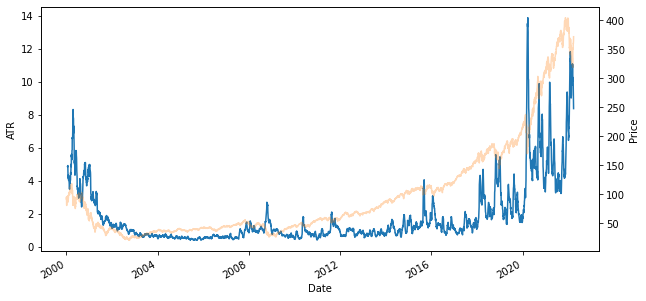

In [30]:
#visualisation for Average True Range (ATR) QQQ
fig, ax = plt.subplots()
average_true_range.plot(ax=ax,figsize=(10,5))
ax2 = res['Close'].plot(ax=ax, secondary_y=True, alpha=.3)
ax.set_ylabel("ATR")
ax2.set_ylabel("Price");

In [31]:
df_close=df_prices.loc[df_prices['Feature']=='Close']
df_close

,Date,Feature,AAPL,AGG,AMD,AMZN,BABA,EFA,EMB,FB,...,GOVT,HYG,LQD,MSFT,NVDA,QQQ,SPY,TSLA,^GSPC,^RUA
1,1999-12-31,Close,0.917969,NaN,14.468750,76.125000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.375000,0.977865,91.375000,146.875000,NaN,1469.250000,793.309998
7,2000-01-03,Close,0.999442,NaN,15.500000,89.375000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.281250,0.975260,94.750000,145.437500,NaN,1455.219971,786.200012
13,2000-01-04,Close,0.915179,NaN,14.625000,81.937500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56.312500,0.949219,88.250000,139.750000,NaN,1399.420044,755.799988
19,2000-01-05,Close,0.928571,NaN,15.000000,69.750000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56.906250,0.917969,86.000000,140.000000,NaN,1402.109985,757.090027
25,2000-01-06,Close,0.848214,NaN,16.000000,65.562500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,55.000000,0.858073,80.093750,137.750000,NaN,1403.449951,756.729980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33553,2022-03-23,Close,170.210007,107.190002,113.919998,3268.159912,117.239998,73.040001,95.750000,213.460007,...,24.959999,81.739998,120.169998,299.489990,256.339996,351.829987,443.799988,999.109985,4456.240234,2590.899902
33559,2022-03-24,Close,174.070007,106.949997,120.529999,3272.989990,115.150002,73.720001,96.129997,219.570007,...,24.910000,81.910004,120.220001,304.100006,281.500000,359.649994,450.489990,1013.919983,4520.160156,2626.909912
33565,2022-03-25,Close,174.720001,106.099998,119.669998,3295.469971,112.989998,73.760002,95.910004,221.820007,...,24.709999,81.320000,119.269997,303.679993,276.920013,359.350006,452.690002,1010.640015,4543.060059,2637.370117
33571,2022-03-28,Close,175.600006,106.360001,120.239998,3379.810059,115.089996,73.519997,96.839996,223.589996,...,24.760000,81.830002,119.930000,310.700012,282.190002,364.910004,455.910004,1091.839966,4540.910156,2655.489990


In [32]:
df_close.isnull().sum()

Date          0
Feature       0
AAPL          0
AGG         939
AMD           0
AMZN          0
BABA       3702
EFA         417
EMB        2003
FB         3115
GLD        1227
GOOG       1163
GOVT       3056
HYG        1827
LQD         645
MSFT          0
NVDA          0
QQQ           0
SPY           0
TSLA       2638
^GSPC         0
^RUA         29
dtype: int64

In [33]:
#extract QQQ data
QQQ_df = df_close[['Date','QQQ']]
QQQ_data = QQQ_df.set_index('Date')
QQQ_data

,QQQ
Date,
1999-12-31,91.375000
2000-01-03,94.750000
2000-01-04,88.250000
2000-01-05,86.000000
2000-01-06,80.093750
...,...
2022-03-23,351.829987
2022-03-24,359.649994
2022-03-25,359.350006


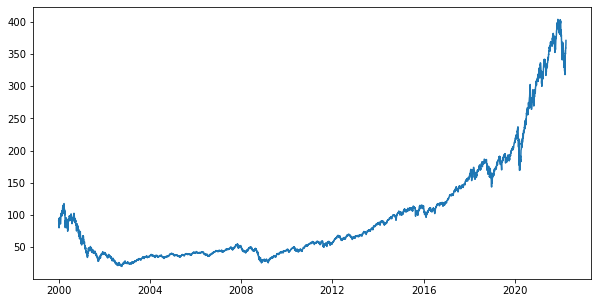

In [34]:
#Visualisation of the QQQ's close overall
plt.figure(figsize=(10,5))
plt.plot(QQQ_data);

In [37]:
#resample the sub datasets into weeks
QQQ_close=QQQ_data.resample("W").mean()

In [38]:
def split_data(data, percent):
    train_size = int(len(data) * percent)
    train, test = data[0:train_size], data[train_size:]
    return train, test

In [39]:
#Split the time series datasets for QQQ Close 
percent=0.7
QQQ_train_test=split_data(QQQ_close, percent)

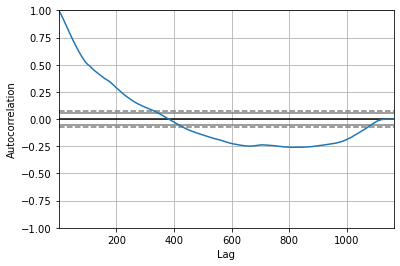

In [40]:
#autocorrelation plots for QQQ Close
from pandas.plotting import autocorrelation_plot
pd.plotting.autocorrelation_plot(QQQ_close);

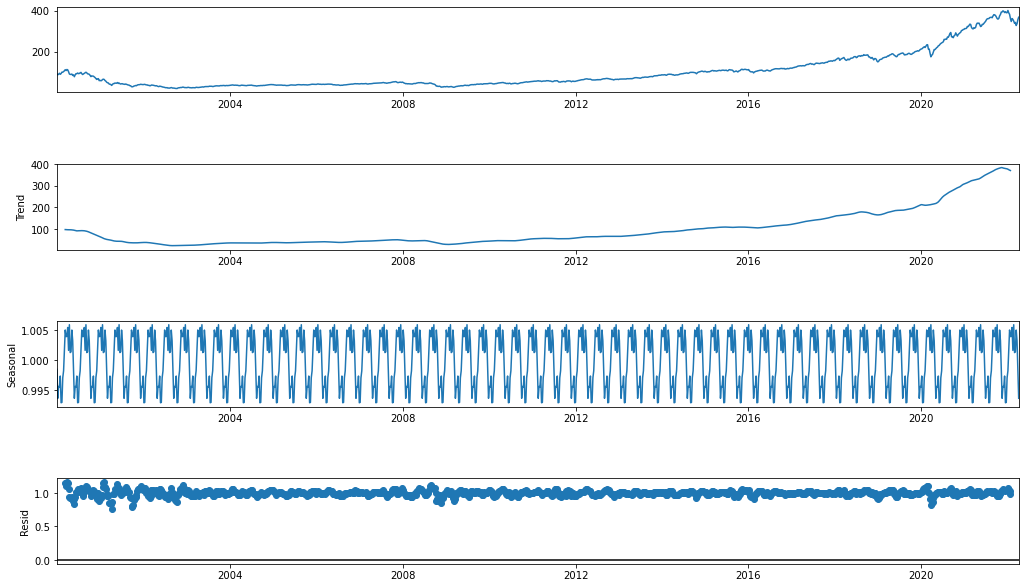

In [22]:
#seasonal_decompose plot for QQQ close, model='mul'
from statsmodels.tsa.seasonal import seasonal_decompose
result_qqq_mul = seasonal_decompose(QQQ_close, model='mul',period=20) 
fig_qqq_mul=result_qqq_mul.plot()
fig_qqq_mul.set_size_inches((16, 9))
plt.show();

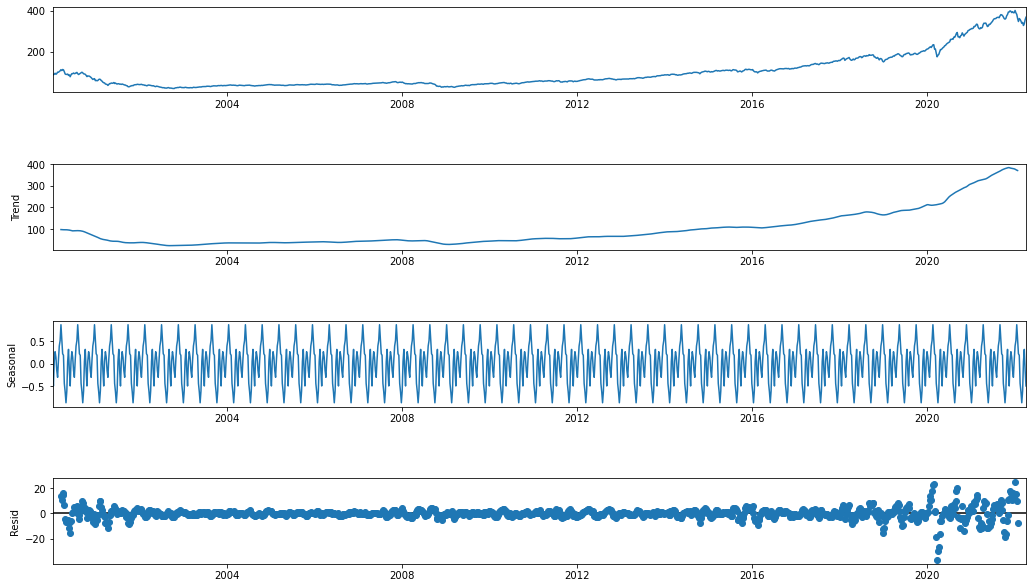

In [23]:
#seasonal_decompose plot for QQQ close, model='add'
from statsmodels.tsa.seasonal import seasonal_decompose
result_qqq_add = seasonal_decompose(QQQ_close, model='add',period=20) 
fig_qqq_add=result_qqq_add.plot()
fig_qqq_add.set_size_inches((16, 9))
plt.show();

**Prediction of QQQ's Close price**

In [24]:
from sklearn.metrics import mean_absolute_percentage_error
import pandas.util.testing as tm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    train, test = X[0].values, X[1].values
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
       # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    error = mean_absolute_percentage_error(test, predictions)
    return rmse,error 
 
def evaluate_models(dataset, p_values, d_values, q_values):
    lst=[]
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)[0]
                    error= evaluate_arima_model(dataset, order)[1]
                    lst.append((order,rmse,error))
                except:
                    continue
    min_tuple = min(lst, key=lambda item: item[2])
    return(f'best p,d,q ={min_tuple[0]}, RMSE value ={min_tuple[1]}, lowest MAPE value ={min_tuple[2]}')

In [25]:
p_values = d_values= q_values= range(0,3)

In [26]:
print('Results for QQQ Close:')
QQQ_lst=evaluate_models(QQQ_train_test, p_values, d_values, q_values)
print(QQQ_lst)

Results for QQQ Close:


C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likeliho

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian faile

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian faile

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian faile

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian faile

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood 

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood opt

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood opt

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood opt

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood 

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood opt

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood opt

C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEE\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood opt

best p,d,q =(0, 2, 2), RMSE value =4.954953445120532, lowest MAPE value =0.01563357563278166


Result for ARIMA:
best p,d,q =(0, 2, 2), RMSE value =4.954953445120532, lowest MAPE value =0.01563357563278166

In [35]:
# create a differenced series
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [41]:
from statsmodels.tsa.arima.model import ARIMA
#ARIMA for QQQ Close
X = QQQ_close['QQQ'].values
wks_in_year = 52
differenced = difference(X, wks_in_year)
# fit model
model = ARIMA(differenced, order=(0,2,2))
model_fit = model.fit()
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 9
#forecast = model_fit.forecast(steps=10)[0]
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
lst_QQQ_close=[]
#wk = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, wks_in_year)
    #print(day, inverted)
    #history.append(inverted)
    lst_QQQ_close.append(inverted)
    #wk += 1
lst_QQQ_close

[383.7342564090292,
 383.8078482217244,
 383.8814400344196,
 383.9550318471148,
 384.02862365981,
 384.10221547250524,
 384.17580728520045,
 384.24939909789566,
 384.3229909105909,
 384.3965827232861]

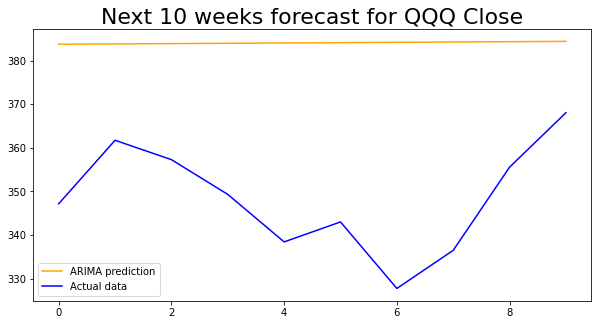

In [71]:
plt.figure(figsize=(10,5))
plt.title('Next 10 weeks forecast for QQQ Close',fontsize= 22)

arima_pred_arr=np.array(lst_QQQ_close)

plt.plot(lst_QQQ_close,'orange', label='ARIMA prediction')
plt.plot(QQQ_close[-10:].to_numpy(),'blue',label='Actual data')
plt.legend(loc="lower left");